In [11]:

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
from tqdm.notebook import tqdm

In [12]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device = torch.device(device)
print(device)

cuda:0


In [14]:
# 자신의 폴더 경로에 맞게 재지정해주세요.
root_path = 'C:\\jupyter\\Externel_activity\\Selfdrive_segmentation\\data\\2DSS\\'

data_dir = root_path

# data_dir의 경로(문자열)와 train(문자열)을 결합해서 train_dir(train 폴더의 경로)에 저장합니다.
train_dir = os.path.join(data_dir, "training\\images")

# data_dir의 경로(문자열)와 val(문자열)을 결합해서 val_dir(val 폴더의 경로)에 저장합니다.
val_dir = os.path.join(data_dir, "validation\\images")

# train_dir 경로에 있는 모든 파일을 리스트의 형태로 불러와서 train_fns에 저장합니다.
train_fns = os.listdir(train_dir)

# val_dir 경로에 있는 모든 파일을 리스트의 형태로 불러와서 val_fns에 저장합니다.
val_fns = os.listdir(val_dir)

print(len(train_fns), len(val_fns))

12000 1500


In [15]:
train_fns

['E_DCG_230829_141_FC_008.jpg',
 'E_DCG_230829_141_FC_013.jpg',
 'E_DCG_230829_141_FC_018.jpg',
 'E_DCG_230829_141_FC_023.jpg',
 'E_DCG_230829_141_FC_028.jpg',
 'E_DCG_230829_141_FC_033.jpg',
 'E_DCG_230829_141_FC_039.jpg',
 'E_DCG_230829_141_FC_044.jpg',
 'E_DCG_230829_141_FC_049.jpg',
 'E_DCG_230829_141_FC_059.jpg',
 'E_DCG_230829_141_FC_064.jpg',
 'E_DCG_230829_141_FC_069.jpg',
 'E_DCG_230829_141_FC_075.jpg',
 'E_DCG_230829_141_FC_090.jpg',
 'E_DCG_230829_141_FC_095.jpg',
 'E_DCG_230829_141_FC_100.jpg',
 'E_DCG_230829_141_FC_106.jpg',
 'E_DCG_230829_141_FC_111.jpg',
 'E_DCG_230829_141_FC_116.jpg',
 'E_DCG_230829_141_FC_121.jpg',
 'E_DCG_230829_141_FC_131.jpg',
 'E_DCG_230829_141_FC_142.jpg',
 'E_DCG_230829_141_FC_147.jpg',
 'E_DCG_230829_141_FC_152.jpg',
 'E_DCG_230829_141_FC_157.jpg',
 'E_DCG_230829_141_FC_162.jpg',
 'E_DCG_230829_141_FC_167.jpg',
 'E_DCG_230829_141_FC_172.jpg',
 'E_DCG_230829_141_FC_178.jpg',
 'E_DCG_230829_141_FC_183.jpg',
 'E_DCG_230829_141_FC_188.jpg',
 'E_DCG_

C:\jupyter\Externel_activity\Selfdrive_segmentation\data\2DSS\training\images\E_DCG_230829_141_FC_008.jpg


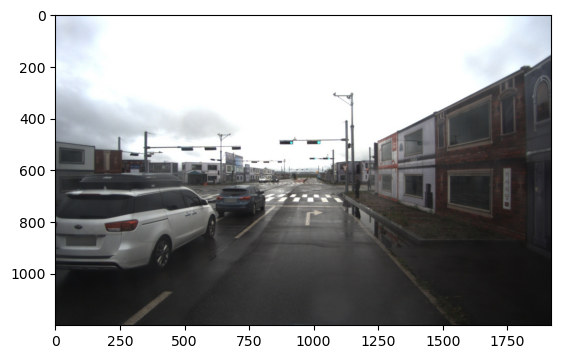

In [16]:
# train_dir(문자열)와 train_fns[0](문자열)의 경로를 결합하여 sample_image_fp(샘플 이미지의 경로)에 저장합니다.
sample_image_fp = os.path.join(train_dir, train_fns[0])
print(sample_image_fp)
# PIL 라이브러리의 Image 모듈을 사용하여, sample_image_fp를 불러옵니다.
# RGB 형태로 변환하여 sample_image에 저장하는 것으로 이해했는데, ".convert("RGB")" 코드는 없어도 될 것 같습니다.
# Image.open() 함수 자체가 RGB의 형태로 불러오는 것으로 이해했습니다. 확실하지 않습니다...
sample_image = Image.open(sample_image_fp)
plt.imshow(sample_image)
plt.show()

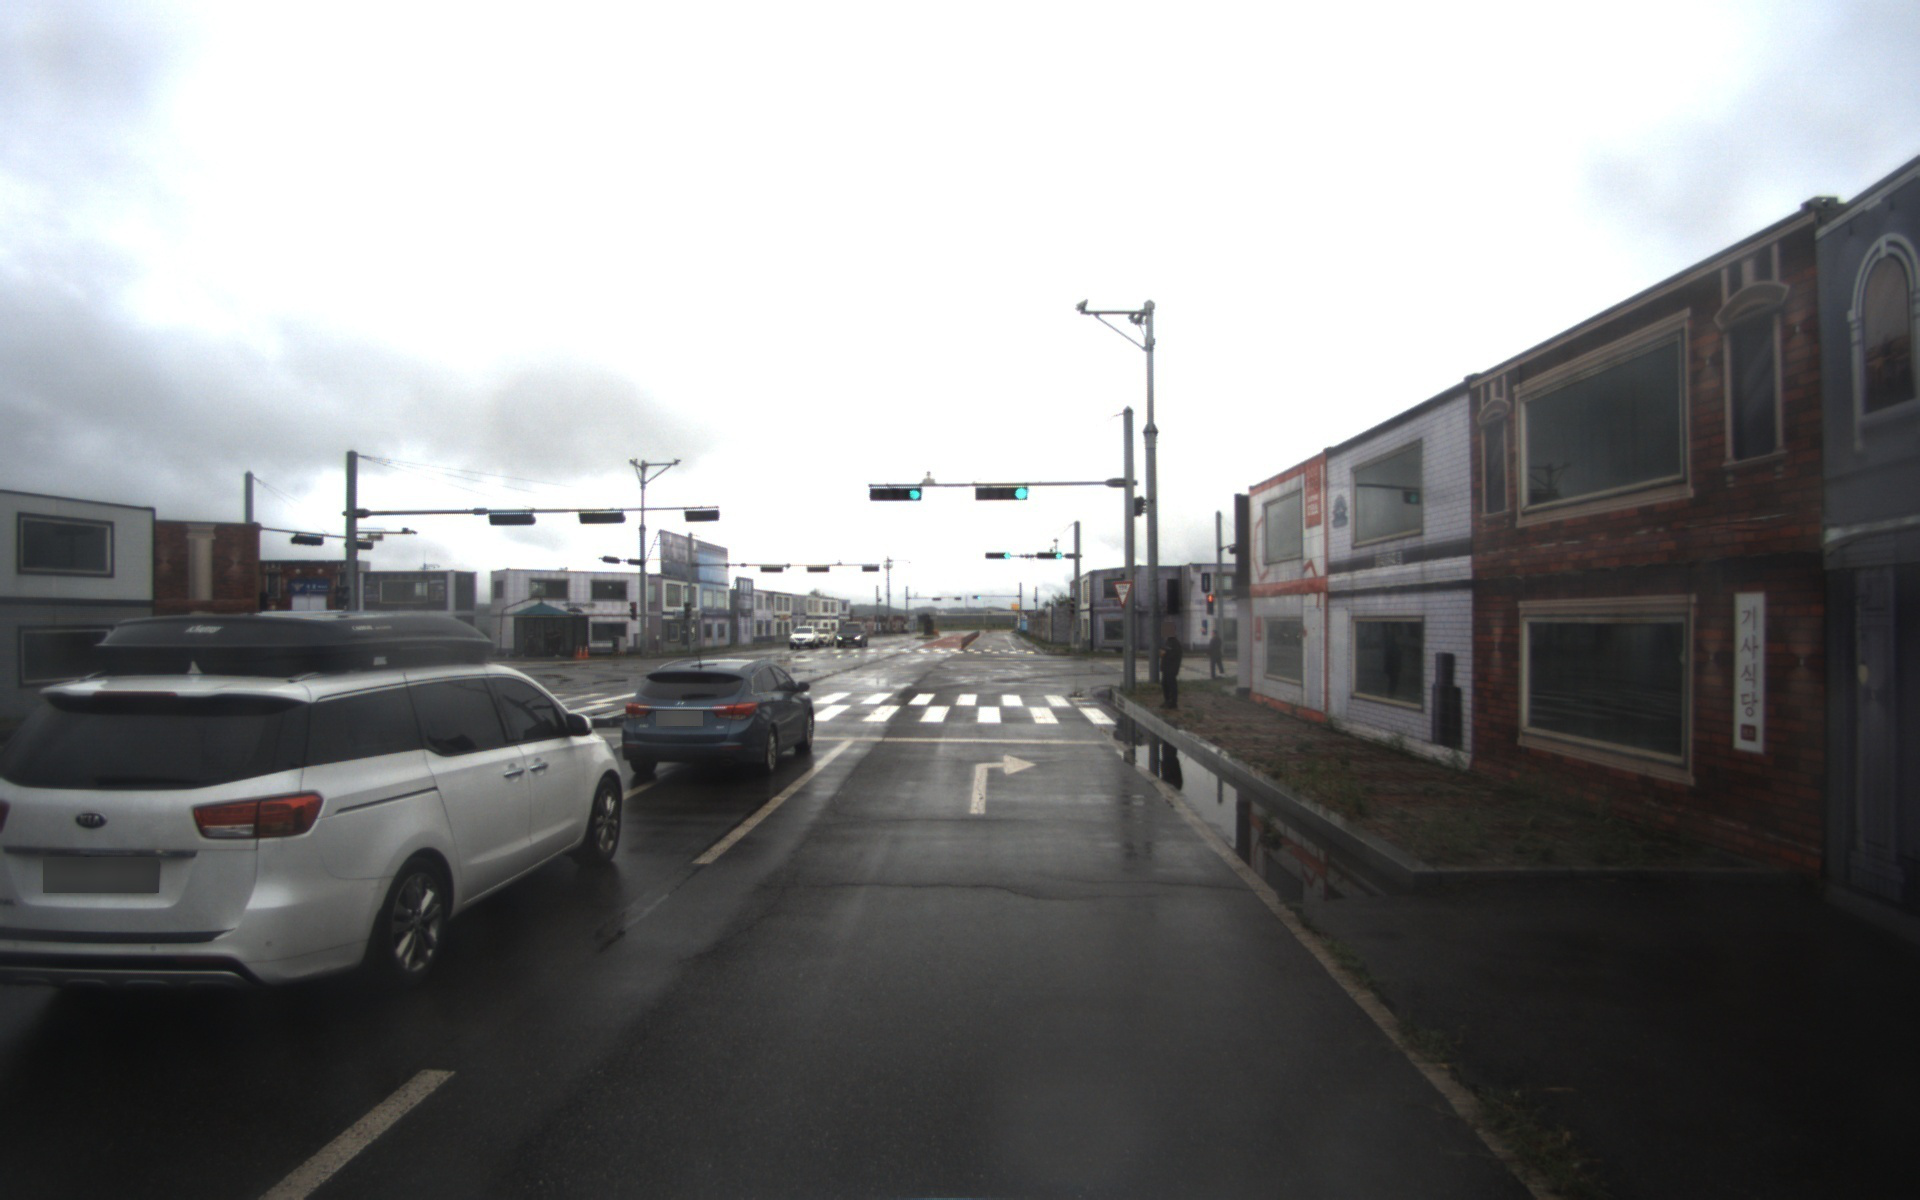

In [20]:
sample_image

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-segmentation", model="CIDAS/clipseg-rd64-refined")

In [ ]:
# Load model directly
from transformers import AutoProcessor, CLIPSegForImageSegmentation

processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")